In [10]:
import pandas as pd

# Relative path to your CSV file
file_path = "/content/mental_health_dataset.csv"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was read correctly
print(data.head())


   Unnamed: 0  SelfEmployed  NumEmployees   TechCompany MentalHealthBenefits  \
0           0             0            63           1.0         I don't know   
1           1             0            15           1.0                   No   
2           2             0            15           1.0                   No   
3           3             1             0  I don't know                   No   
4           4             0            15           0.0                  yes   

  EmployerDiscussedMentalHealth ResourcesForMentalHealth AnonymityProtected  \
0                            No                       No       I don't know   
1                           yes                      yes                Yes   
2                            No                       No       I don't know   
3                            No                       No       I don't know   
4                            No                       No                 No   

     MentalHealthMedicalLeave DiscussMentalH

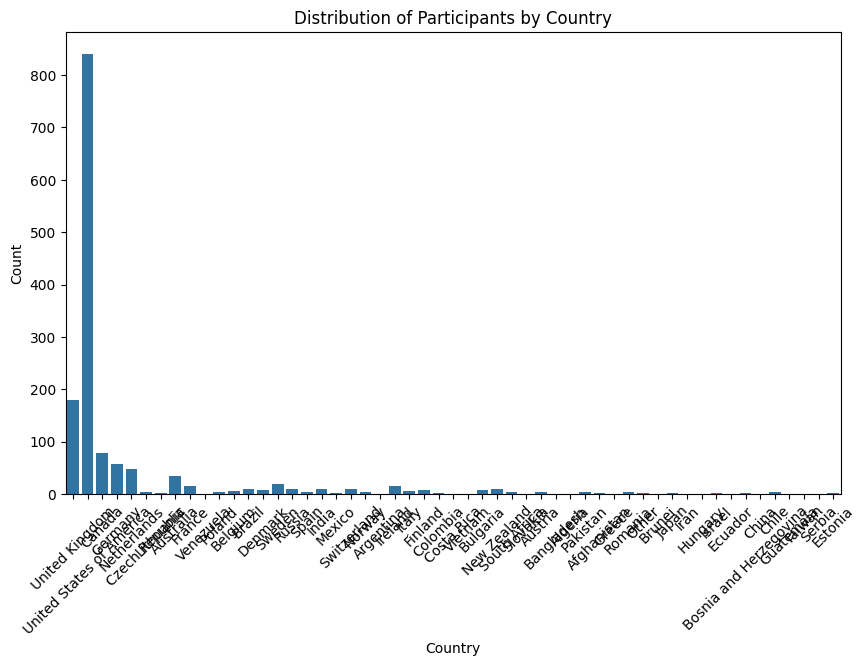

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='CountryLiveIn', data=data)
plt.title('Distribution of Participants by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

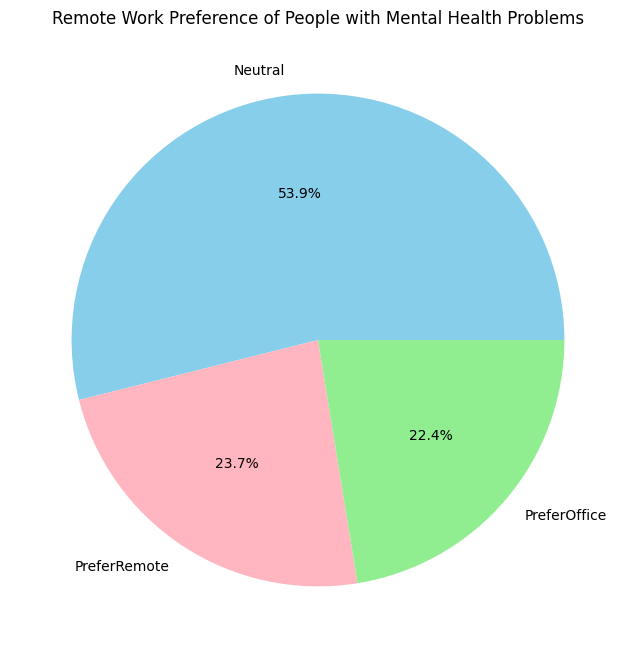

In [12]:
mental_health_data = data[data['CurrentMentalHealthDisorder'] == 'Yes']

# Count the number of people who prefer and do not prefer remote work
remote_work_preference_counts = mental_health_data['RemoteWorkPreference'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(remote_work_preference_counts, labels=remote_work_preference_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightpink', 'lightgreen'])
plt.title('Remote Work Preference of People with Mental Health Problems')
plt.show()

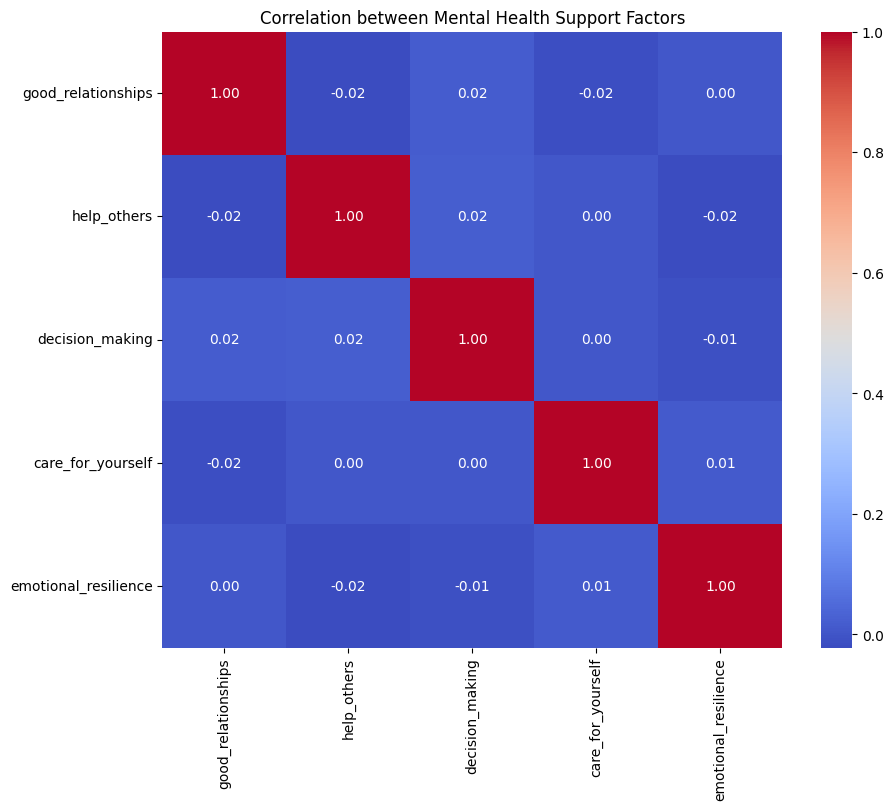

In [13]:
mental_health_factors = ['good_relationships', 'help_others', 'decision_making', 'care_for_yourself', 'emotional_resilience']
mental_health_corr = data[mental_health_factors].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(mental_health_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Mental Health Support Factors')
plt.show()


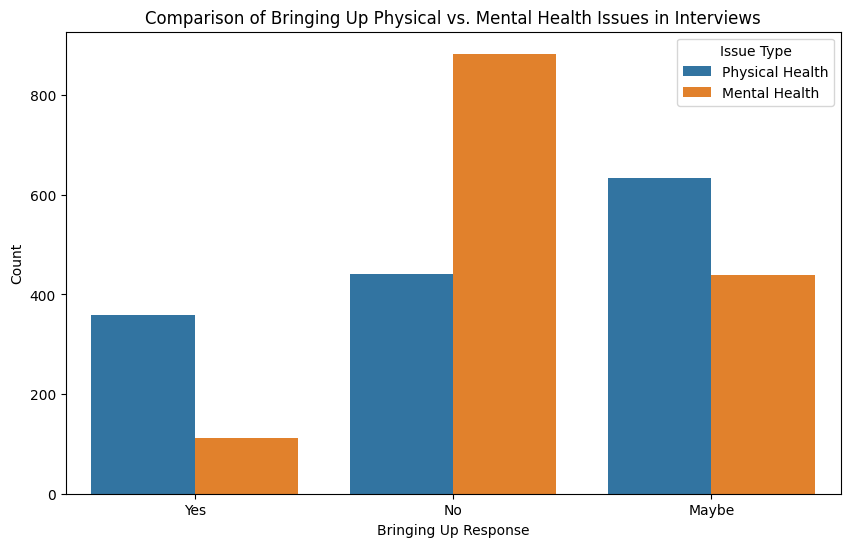

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with counts for each combination of bringing up physical and mental health issues
counts_data = pd.DataFrame({
    'Category': ['Yes', 'No', 'Maybe'],
    'Physical Health': [
        (data['BringUpPhysicalHealthIssueInInterview'] == 'Yes').sum(),
        (data['BringUpPhysicalHealthIssueInInterview'] == 'No').sum(),
        (data['BringUpPhysicalHealthIssueInInterview'] == 'Maybe').sum()
    ],
    'Mental Health': [
        (data['BringUpMentalHealthIssueInInterview'] == 'Yes').sum(),
        (data['BringUpMentalHealthIssueInInterview'] == 'No').sum(),
        (data['BringUpMentalHealthIssueInInterview'] == 'Maybe').sum()
    ]
})

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_data.melt(id_vars='Category', var_name='Issue Type', value_name='Count'), x='Category', y='Count', hue='Issue Type')
plt.title('Comparison of Bringing Up Physical vs. Mental Health Issues in Interviews')
plt.xlabel('Bringing Up Response')
plt.ylabel('Count')
plt.legend(title='Issue Type')
plt.show()


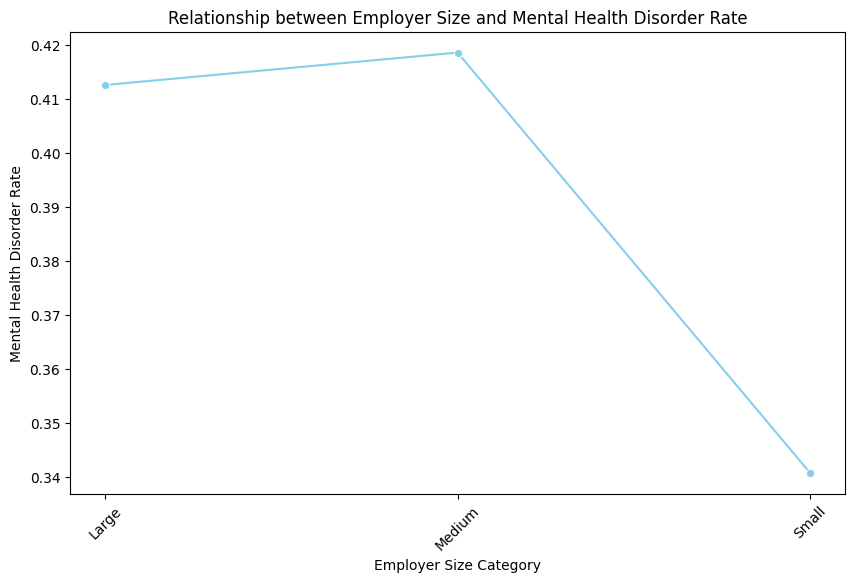

In [15]:
employer_size_data = data.groupby('EmployerSizeCategory')['CurrentMentalHealthDisorder'].apply(lambda x: (x == 'Yes').mean()).reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='EmployerSizeCategory', y='CurrentMentalHealthDisorder', data=employer_size_data, marker='o', color='skyblue')
plt.title('Relationship between Employer Size and Mental Health Disorder Rate')
plt.xlabel('Employer Size Category')
plt.ylabel('Mental Health Disorder Rate')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-8e0ea3e099de>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='EmployerSizeCategory', y='ViewedNegativelyByCoWorkersWithMentalHealthIssue', data=data, ci=None, markers='o', linestyles='-', palette='magma')
<ipython-input-16-8e0ea3e099de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='EmployerSizeCategory', y='ViewedNegativelyByCoWorkersWithMentalHealthIssue', data=data, ci=None, markers='o', linestyles='-', palette='magma')


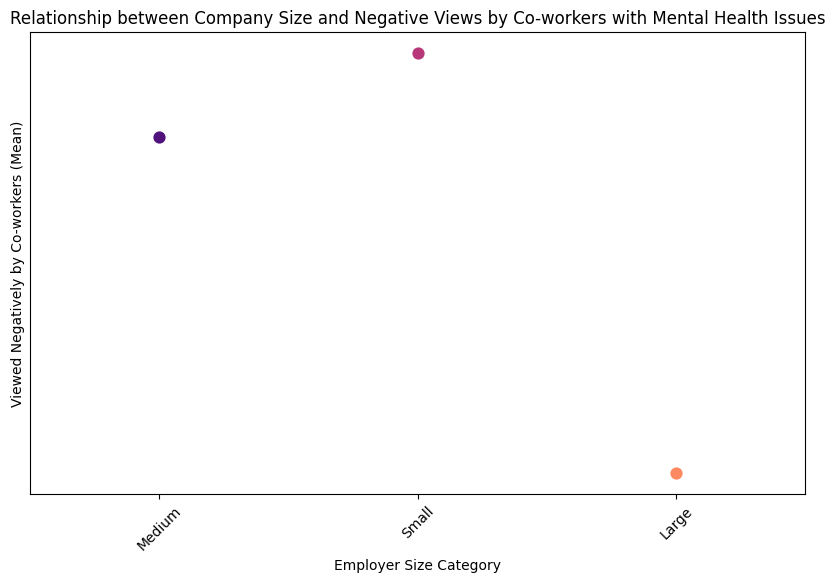

In [16]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='EmployerSizeCategory', y='ViewedNegativelyByCoWorkersWithMentalHealthIssue', data=data, ci=None, markers='o', linestyles='-', palette='magma')
plt.title('Relationship between Company Size and Negative Views by Co-workers with Mental Health Issues')
plt.xlabel('Employer Size Category')
plt.ylabel('Viewed Negatively by Co-workers (Mean)')
plt.xticks(rotation=45)
plt.show()

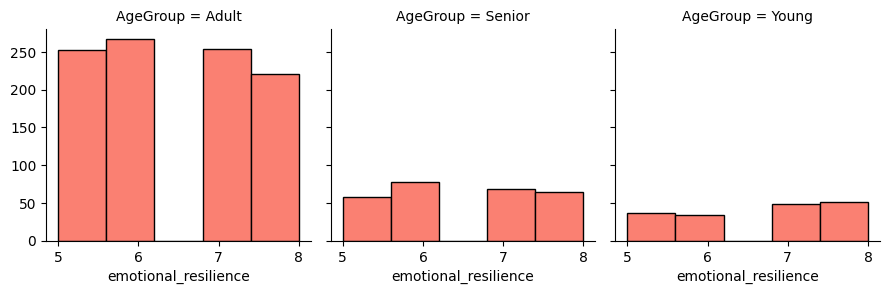

In [33]:
filtered_data = data[data['AgeGroup'] != 'Prefer not to say']

# Creating the FacetGrid without the "prefer not to say" group
g = sns.FacetGrid(filtered_data, col='AgeGroup', col_wrap=3)
g.map(plt.hist, 'emotional_resilience', bins=5, color='salmon', edgecolor='black')
plt.subplots_adjust(top=0.9)
plt.show()